### Importação dos dados



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [13]:
# @title Desafio extra

local_counts = loja1['Local da compra'].value_counts().reset_index()
local_counts.columns = ['Local da compra', 'Count']

# Obter locais únicos e suas contagens
location_data = loja1.groupby('Local da compra').agg({'lat': 'first', 'lon': 'first', 'Produto': 'count'}).reset_index()
location_data.rename(columns={'Produto': 'Count'}, inplace=True)

fig = px.density_mapbox(location_data, lat='lat', lon='lon', z='Count',
                           radius=10,
                           center=dict(lat=-23.55, lon=-46.63),  # Coordenadas de São Paulo
                           zoom=5,
                           mapbox_style="carto-positron")
fig.show()

#1. Análise do faturamento


Faturamento loja1: R$ 1534509.12
Faturamento loja2: R$ 1488459.06
Faturamento loja3: R$ 1464025.03
Faturamento loja4: R$ 1384497.58


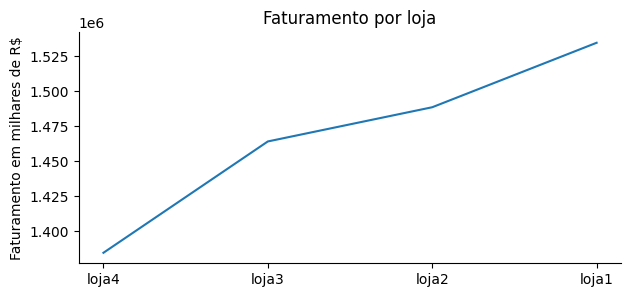

In [ ]:
fat_loja1 = sum(loja1['Preço'])
fat_loja2 = sum(loja2['Preço'])
fat_loja3 = sum(loja3['Preço'])
fat_loja4 = sum(loja4['Preço'])
print(f'Faturamento loja1: R$ {fat_loja1:.2f}')
print(f'Faturamento loja2: R$ {fat_loja2:.2f}')
print(f'Faturamento loja3: R$ {fat_loja3:.2f}')
print(f'Faturamento loja4: R$ {fat_loja4:.2f}')

# dt_comp1 = loja1['Data da Compra'],loja1['Preço']
# dt_comp2 = loja2['Data da Compra'],loja2['Preço']
# dt_comp3 = loja3['Data da Compra'],loja3['Preço']
# dt_comp4 = loja4['Data da Compra'],loja4['Preço']
# ano = []
# fatA = []
# dic = {}
# def fat_ano(dt, loja):
#   for i in range(len(dt[0])):
#     if dt[0][i].split('/')[2] not in ano:
#       ano.append(dt[0][i].split('/')[2])

#   for y in range(len(ano)):
#     fat_anual = 0
#     for p in range(len(dt[0])):
#       if ano[y] == dt[0][p].split('/')[2]:
#         fat_anual += dt[1][p]

#     fatA.append(fat_anual)
#     # dic = {ano[y]: fatA[y]}
#     print(f'Faturamento da loja {loja} em {ano[y]}: R$ {fatA[y]:.2f}')

#   dic = {ano[i]: fatA[i] for i in range(len(ano))}
#   plt.figure(figsize=(7,5))
#   plt.plot(ano, fatA, 'go--', linewidth=2)
#   plt.xlabel('Ano')
#   plt.ylabel('Faturamento em milhares de R$')
#   plt.title(f'Faturamento por ano da loja {loja}')
#   # plt.ylim(1300000, 1540000)
#   plt.gca().spines[['top', 'right',]].set_visible(False)
#   plt.show()
#   print('\n')

# fat_ano(dt_comp1, 1)
# fat_ano(dt_comp2, 2)
# fat_ano(dt_comp3, 3)
# fat_ano(dt_comp4, 4)
fat = pd.concat=([loja1['Preço'].sum(), loja2['Preço'].sum(), loja3['Preço'].sum(), loja4['Preço'].sum()])
lojas = ['loja1', 'loja2', 'loja3', 'loja4']
fat.sort()
lojas.sort(reverse=True)
plt.figure(figsize=(7,3))
plt.plot(lojas, fat)
plt.ylabel('Faturamento em milhares de R$')
plt.title('Faturamento por loja')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# 2. Vendas por Categoria


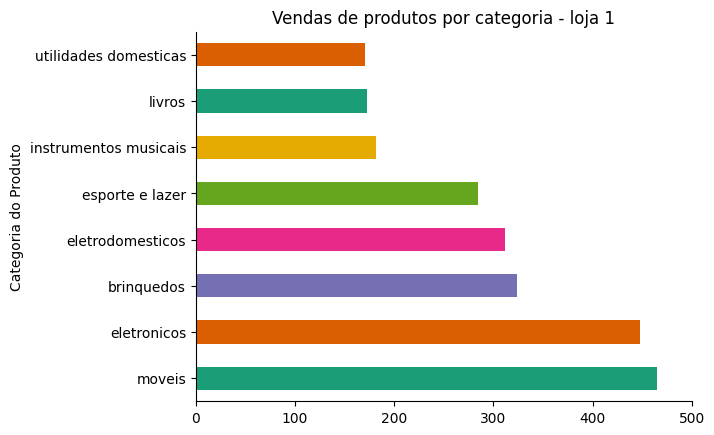

Mais vendida da loja 1: moveis, com 465 vendas.
Menos vendida da loja 1: utilidades domesticas, com 171 vendas.



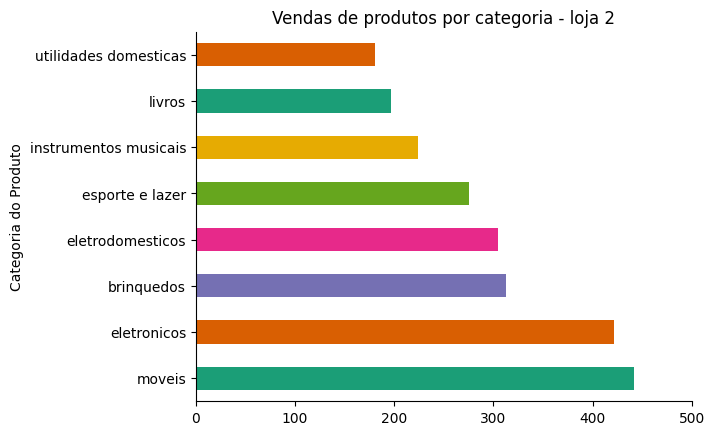

Mais vendida da loja 2: moveis, com 442 vendas.
Menos vendida da loja 2: utilidades domesticas, com 181 vendas.



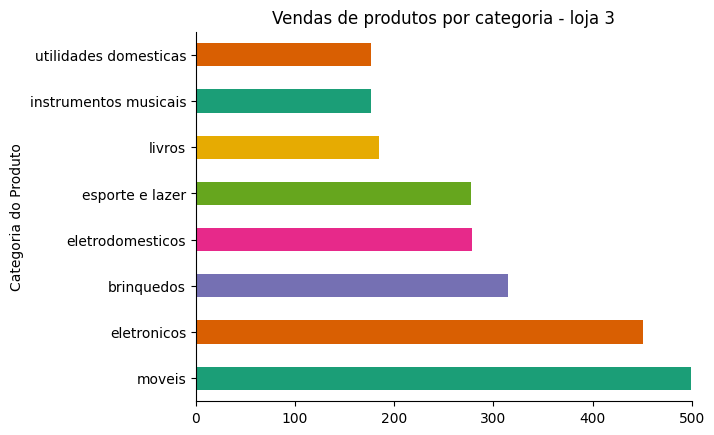

Mais vendida da loja 3: moveis, com 499 vendas.
Menos vendida da loja 3: instrumentos musicais, com 177 vendas.



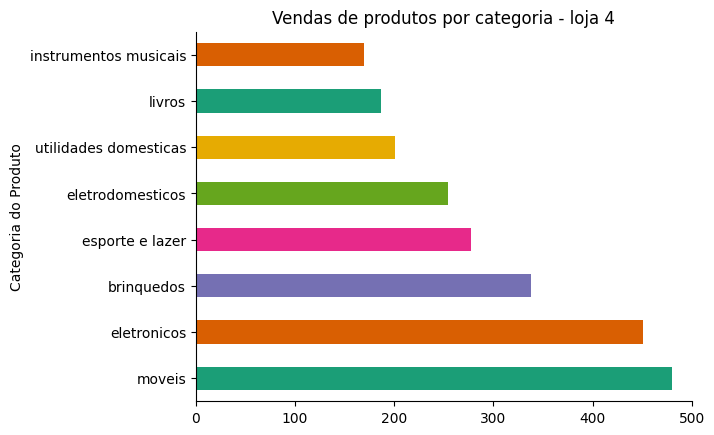

Mais vendida da loja 4: moveis, com 480 vendas.
Menos vendida da loja 4: instrumentos musicais, com 170 vendas.



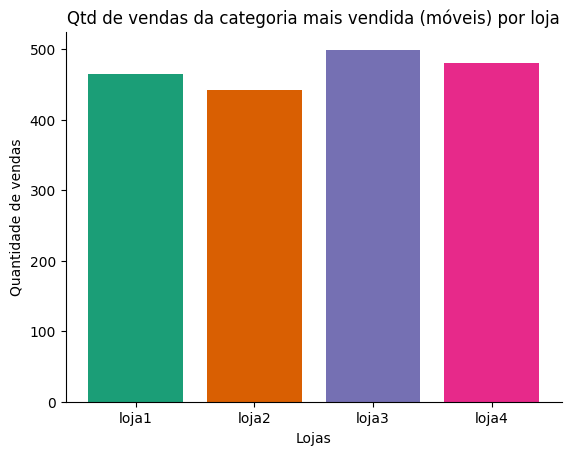

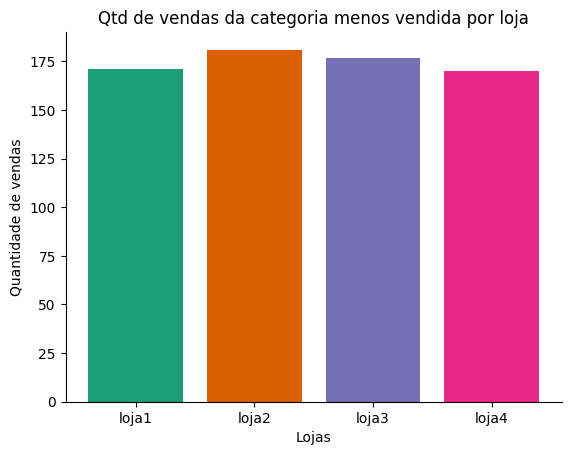

In [ ]:
prod_e_cat_loja1 = loja1['Produto'].groupby(loja1['Categoria do Produto']).count().sort_values(ascending=False)
prod_e_cat_loja2 = loja2['Produto'].groupby(loja2['Categoria do Produto']).count().sort_values(ascending=False)
prod_e_cat_loja3 = loja3['Produto'].groupby(loja3['Categoria do Produto']).count().sort_values(ascending=False)
prod_e_cat_loja4 = loja4['Produto'].groupby(loja4['Categoria do Produto']).count().sort_values(ascending=False)

def ger_graf(prod_e_cat, loja):
  prod_e_cat.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
  plt.xlim(0,500)
  plt.title(f'Vendas de produtos por categoria - loja {loja}')
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.show()
  print(f'Mais vendida da loja {loja}: {prod_e_cat.idxmax()}, com {prod_e_cat.max()} vendas.')
  print(f'Menos vendida da loja {loja}: {prod_e_cat.idxmin()}, com {prod_e_cat.min()} vendas.\n')

ger_graf(prod_e_cat_loja1, '1')
ger_graf(prod_e_cat_loja2, '2')
ger_graf(prod_e_cat_loja3, '3')
ger_graf(prod_e_cat_loja4, '4')

dic_cat = {'loja1': prod_e_cat_loja1.max(), 'loja2': prod_e_cat_loja2.max(), 'loja3': prod_e_cat_loja3.max(), 'loja4': prod_e_cat_loja4.max()}
plt.bar(dic_cat.keys(), dic_cat.values(), color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Lojas')
plt.ylabel('Quantidade de vendas')
plt.title('Qtd de vendas da categoria mais vendida (móveis) por loja')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()
print('\n')

dic_cat = {'loja1': prod_e_cat_loja1.min(), 'loja2': prod_e_cat_loja2.min(), 'loja3': prod_e_cat_loja3.min(), 'loja4': prod_e_cat_loja4.min()}
plt.bar(dic_cat.keys(), dic_cat.values(), color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Lojas')
plt.ylabel('Quantidade de vendas')
plt.title('Qtd de vendas da categoria menos vendida por loja')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# 3. Média de Avaliação das Lojas

Média de avaliação da loja1: 3.98

Média de avaliação da loja2: 4.04

Média de avaliação da loja3: 4.05

Média de avaliação da loja4: 4.00


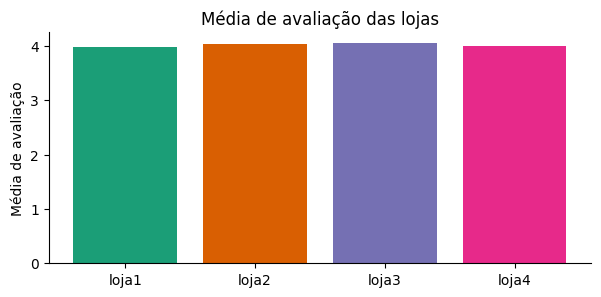

In [ ]:
media_loja1 = loja1['Avaliação da compra'].mean()
print(f'Média de avaliação da loja1: {media_loja1:.2f}\n')
media_loja2 = loja2['Avaliação da compra'].mean()
print(f'Média de avaliação da loja2: {media_loja2:.2f}\n')
media_loja3 = loja3['Avaliação da compra'].mean()
print(f'Média de avaliação da loja3: {media_loja3:.2f}\n')
media_loja4 = loja4['Avaliação da compra'].mean()
print(f'Média de avaliação da loja4: {media_loja4:.2f}')

med_lojas = pd.concat=([loja1['Avaliação da compra'].mean(), loja2['Avaliação da compra'].mean(), loja3['Avaliação da compra'].mean(), loja4['Avaliação da compra'].mean()])
lojas.sort(reverse=False)
plt.figure(figsize=(7,3))
plt.bar(lojas, med_lojas, color=sns.palettes.mpl_palette('Dark2'))
plt.ylabel('Média de avaliação')
plt.title('Média de avaliação das lojas')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# 4. Produtos Mais e Menos Vendidos

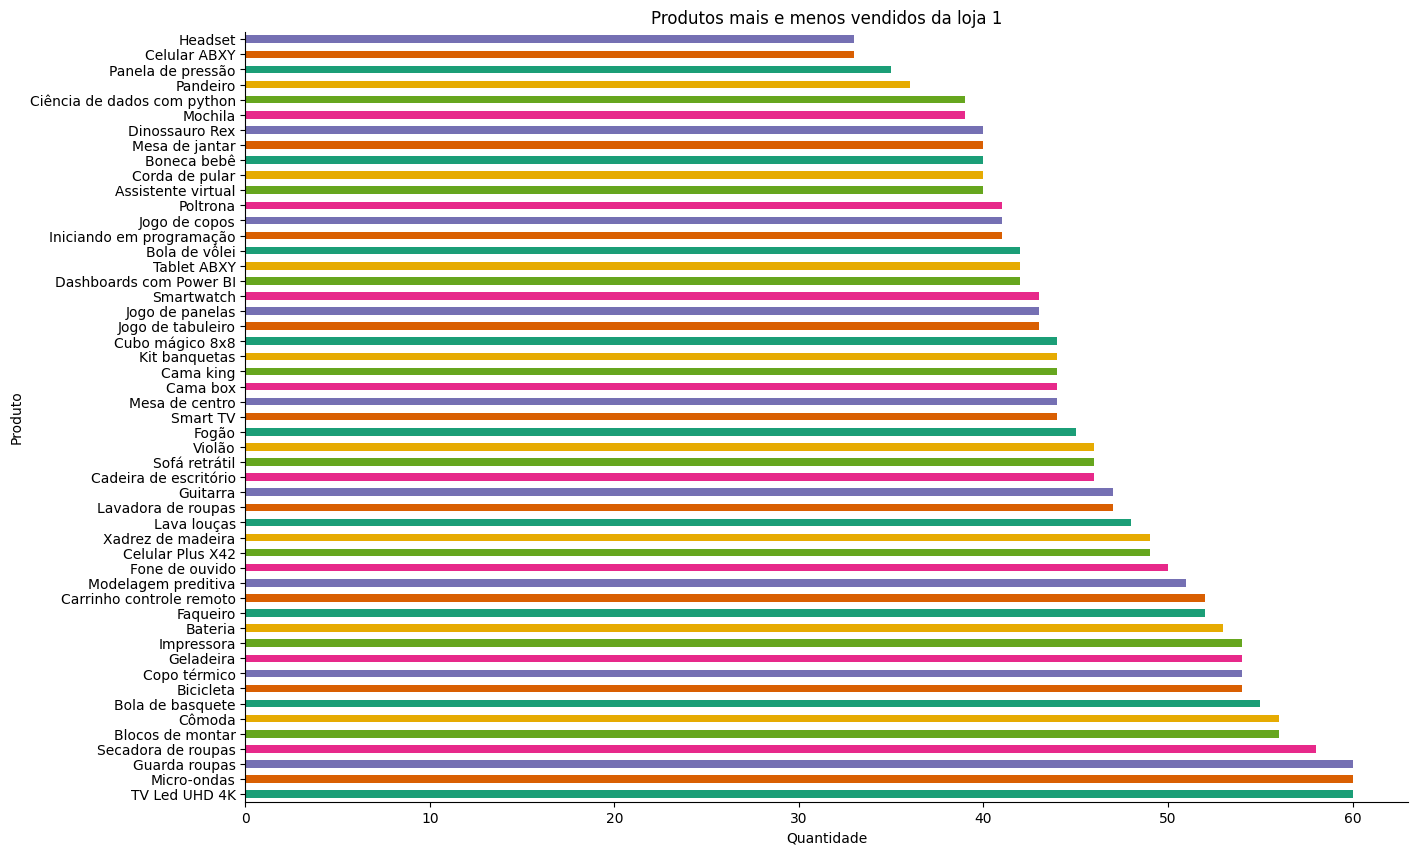

Produto(s) mais vendido(s) da loja 1: ['TV Led UHD 4K', 'Micro-ondas', 'Guarda roupas'], no total de 60 vendas.
Produto(s) menos vendido(s) da loja 1: ['Celular ABXY', 'Headset'], no total de 33 vendas.



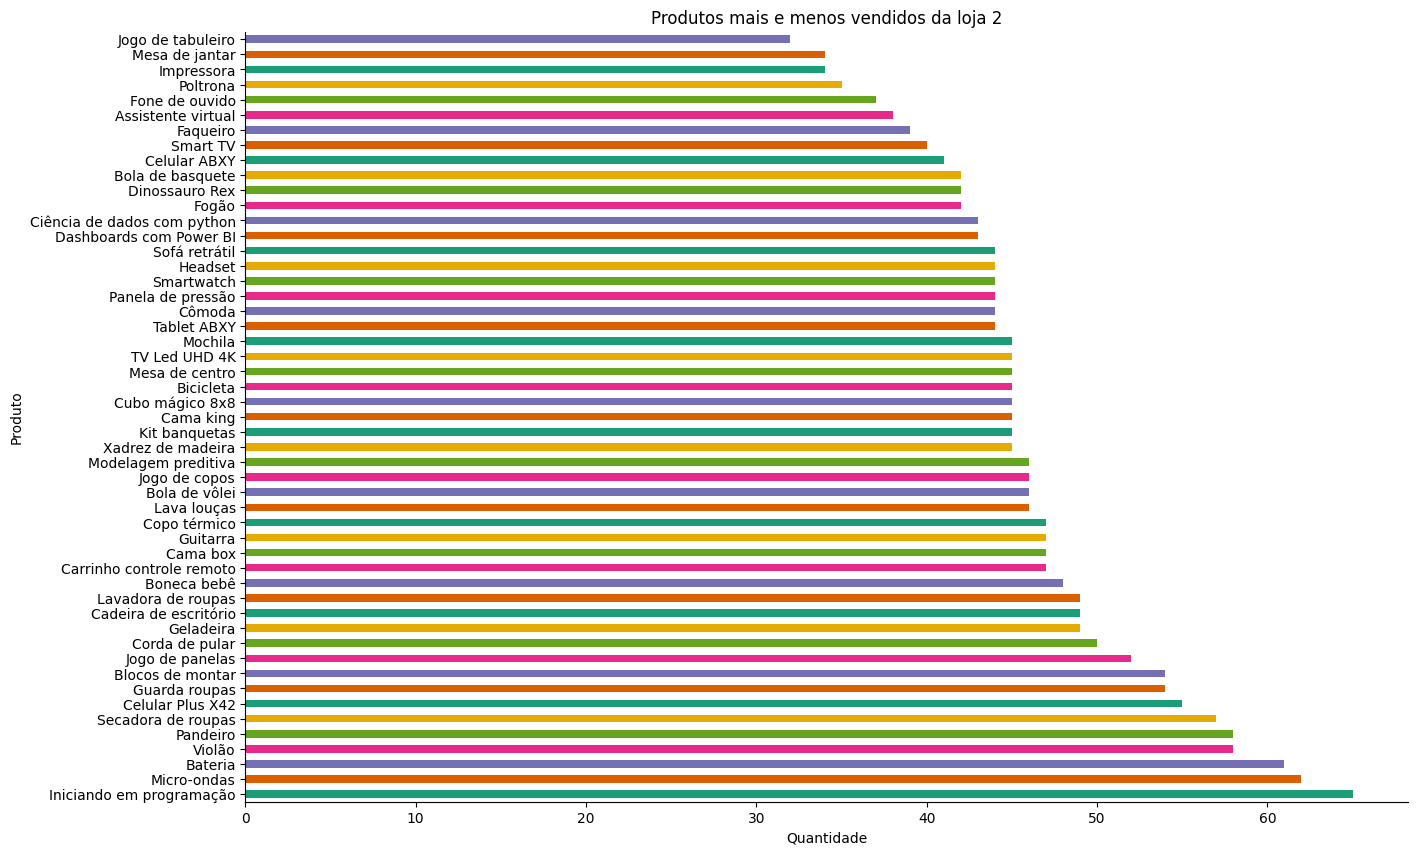

Produto(s) mais vendido(s) da loja 2: ['Iniciando em programação'], no total de 65 vendas.
Produto(s) menos vendido(s) da loja 2: ['Jogo de tabuleiro'], no total de 32 vendas.



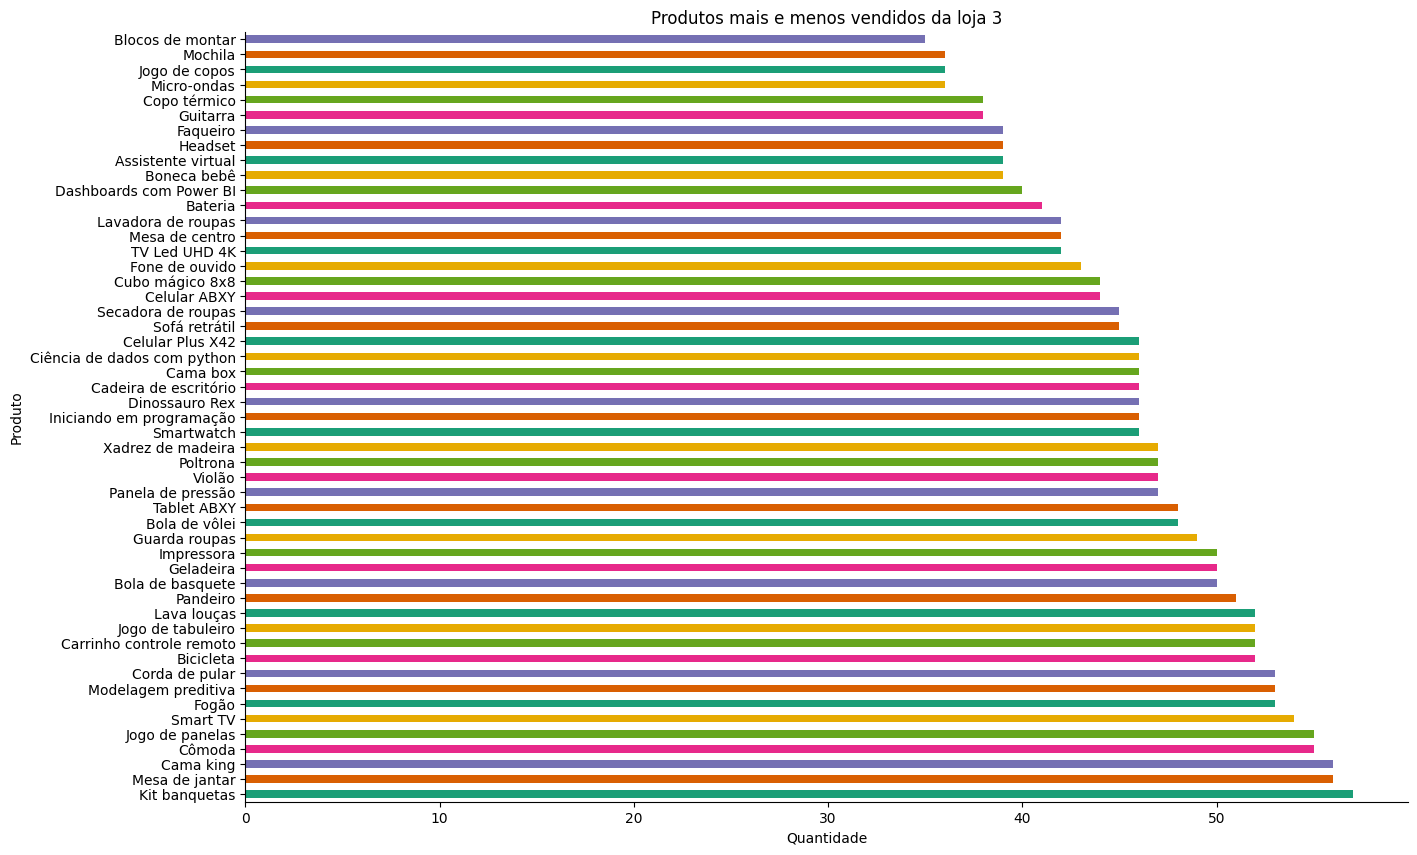

Produto(s) mais vendido(s) da loja 3: ['Kit banquetas'], no total de 57 vendas.
Produto(s) menos vendido(s) da loja 3: ['Blocos de montar'], no total de 35 vendas.



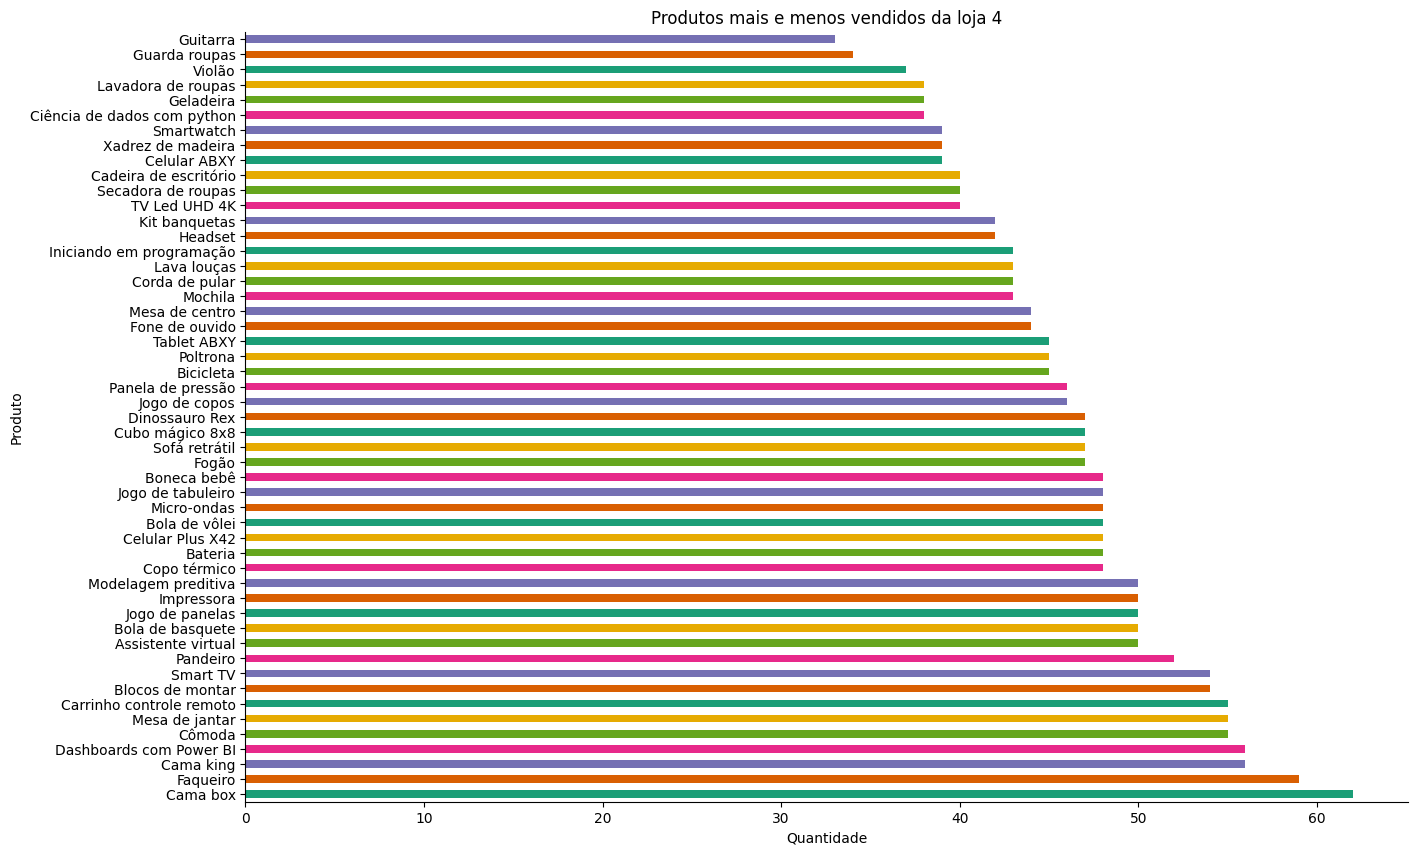

Produto(s) mais vendido(s) da loja 4: ['Cama box'], no total de 62 vendas.
Produto(s) menos vendido(s) da loja 4: ['Guitarra'], no total de 33 vendas.



In [ ]:
from collections.abc import ValuesView

prodG1 = loja1['Produto'].groupby(loja1['Produto']).count().sort_values(ascending=False)
pro1 = loja1['Produto']
prodG2 = loja2['Produto'].groupby(loja2['Produto']).count().sort_values(ascending=False)
pro2 = loja2['Produto']
prodG3 = loja3['Produto'].groupby(loja3['Produto']).count().sort_values(ascending=False)
pro3 = loja3['Produto']
prodG4 = loja4['Produto'].groupby(loja4['Produto']).count().sort_values(ascending=False)
pro4 = loja4['Produto']

def verifProd(prodG, pro, loja):

  plt.figure(figsize=(15,10))
  prodG.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.title(f'Produtos mais e menos vendidos da loja {loja}')
  plt.xlabel('Quantidade')

  prodsT = []
  prodsD = []

  max_loja = prodG.max()
  min_loja = prodG.min()

  for i in range(len(pro)):
    if pro[i] == prodG.idxmax():
      if prodG.max() == max_loja:
        prodsT.append(pro[i])
        prodG.pop(prodG.idxmax())

    if pro[i] == prodG.idxmin():
      if prodG.min() == min_loja:
        prodsD.append(pro[i])
        prodG.pop(prodG.idxmin())
  plt.show()
  print(f'Produto(s) mais vendido(s) da loja {loja}: {prodsT}, no total de {max_loja} vendas.')
  print(f'Produto(s) menos vendido(s) da loja {loja}: {prodsD}, no total de {min_loja} vendas.\n')


verifProd(prodG1, pro1, '1')
verifProd(prodG2, pro2, '2')
verifProd(prodG3, pro3, '3')
verifProd(prodG4, pro4, '4')

# 5. Frete Médio por Loja


Frete médio da loja1: R$ 34.69

Frete médio da loja2: R$ 33.62

Frete médio da loja3: R$ 33.07

Frete médio da loja4: R$ 31.28


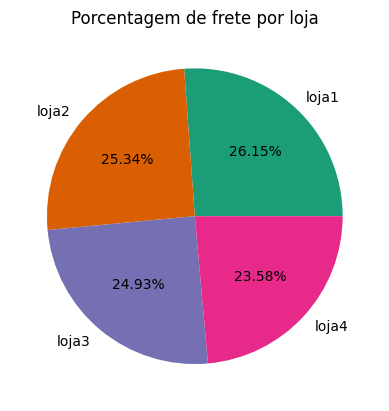

In [ ]:
fre_loja1 = loja1['Frete'].mean()
print(f'Frete médio da loja1: R$ {fre_loja1:.2f}\n')
fre_loja2 = loja2['Frete'].mean()
print(f'Frete médio da loja2: R$ {fre_loja2:.2f}\n')
fre_loja3 = loja3['Frete'].mean()
print(f'Frete médio da loja3: R$ {fre_loja3:.2f}\n')
fre_loja4 = loja4['Frete'].mean()
print(f'Frete médio da loja4: R$ {fre_loja4:.2f}')
fre_medio = pd.concat=([loja1['Frete'].mean(), loja2['Frete'].mean(), loja3['Frete'].mean(), loja4['Frete'].mean()])

plt.pie(fre_medio, labels=['loja1', 'loja2', 'loja3', 'loja4'], colors=sns.palettes.mpl_palette('Dark2'), autopct='%.2f%%')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Porcentagem de frete por loja')
plt.show()

# Relatório final


<p align="justify">Este relatório tem como objetivo fornecer insights para tomada de decisão baseado em dados de faturamento, custos de frete, categorias de produtos mais e menos vendida e a avaliação dos clientes. Tais dados foram coletados nos anos de 2020, 2021, 2022 e 2023.</p>

<p align="justify">Observando os dados de faturamento nos quatro anos (2020 a 2023), verifica-se que a loja com maior faturamento foi a loja1 com R$ 1.534.509,12.</p>

<p align="justify">A de menor faturamento nesse mesmo período foi a loja 4 com R$ 1.384.497,58, como demonstrado no gráfico abaixo:</p>

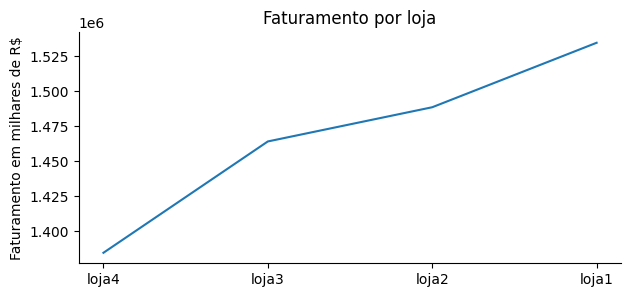

<p align="justify">Analisando o custo médio de frete das lojas, verifica-se que a mais vendeu também teve um custo maior com frete, ficando elas no mesmo ranking, veja no gráfico abaixo esse posicionamento:</p>

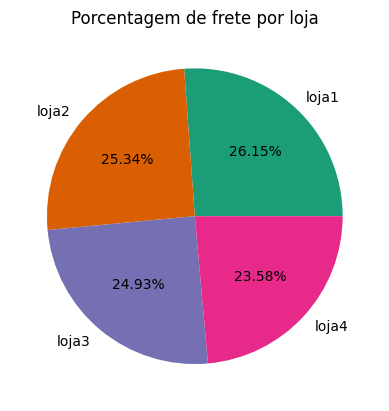

<p align="justify">Já na avaliação dos clientes a loja destaque é a 3 com uma pontuação média de 4.05 e a loja 1 com a menor pontuação com uma média de 3.98. A figura abaixo ilustra isto e exibe as demais lojas:</p>

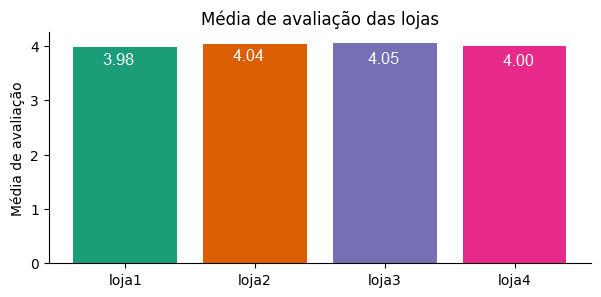

<p align="justify">Por fim, das categorias de produtos, a mais vendida foi móveis e a loja que vendeu mais nesta categoria foi a 3 com 499 vendas, veja abaixo como ficou rankeada as lojas nesse quisito:</p>

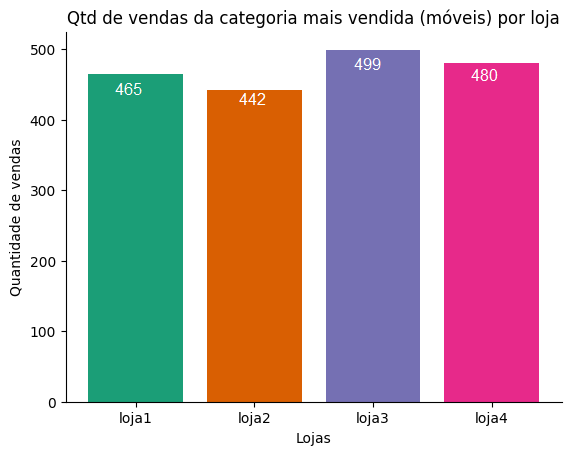

<p align="justify">Conclui-se então que a loja mais eficiente dentre as 4 avaliadas é a loja 2, ficou em segundo lugar no faturamento, segunda mais bem avaliada pelos clientes com diferença para a primeira colocada de apenas 0.01. Nas despesas com frete ela teve desempenho proporcional ao seu número de vendas. Isso mostra eficácia e eficiência na execução de suas atividades, refletindo na boa avaliação de seus clientes. A menos eficiente foi a loja 4, menor faturamento, frete médio proporcional à suas vendas e a terceira mais bem avaliada pelos clientes, demonstrando menos eficiente que as demais.</p>

<p align="justify">Haja vista o exposto, remenda-se a venda da loja 4 para aplicar em produtos, preferencialmente os móveis, pois foram os mais vendidos e fortalecer as 3 outras lojas.